In [1]:
import pandas as ad
import os 
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt


In [3]:
def hu_transforme(img):
    window_level = -600
    window_width = 1500

    # Apply the windowing filter
    window_filter = sitk.IntensityWindowingImageFilter()
    window_filter.SetWindowMinimum(window_level - window_width/2.0)
    window_filter.SetWindowMaximum(window_level + window_width/2.0)
    window_filter.SetOutputMinimum(0)
    window_filter.SetOutputMaximum(255)
    image_windowed = window_filter.Execute(img)
    return image_windowed

In [4]:
def get_2ddataset(paths):
    
    df = ad.read_csv("D:/fin_de_etude/data/annotations.csv")
    j = 1
    for path in paths:
        for  file in os.listdir(path):
            if file.endswith(".mhd"):
                if file[:-4] in df["seriesuid"].tolist():
                    image = sitk.ReadImage(os.path.join(path, file))
                    image = hu_transforme(image)
                    df_2 = df[df["seriesuid"] == file[:-4]]
                    i = 1
                    for index in df_2.index:
                        
                        x, y, z, d = df_2["coordX"][index], df_2["coordY"][index], df_2["coordZ"][index], df_2["diameter_mm"][index]
                        print(x, y, z, d)
                        point = (x, y, z) #  coordinates qui existe dans le fichier annotation
                        point_idx = image.TransformPhysicalPointToContinuousIndex(point) # transformer les coordinnaies de les données physique real a mond reél à des donnees presentable dans l'image
                        pixel_size = image.GetSpacing()[0]
                        
                        image_diameter = d /pixel_size
                        df["seriesuid"][index] = f"image{j}_slice{int(point_idx[2])}"
                        df["coordX"][index] = point_idx[0]
                        df["coordY"][index] = point_idx[1]
                        df["coordZ"][index] = point_idx[2]
                        df["diameter_mm"][index] = image_diameter
                        print(point_idx, image_diameter)
                        if index == df_2.index[0] or point_idx[2] != slice:
                            array_3d = sitk.GetArrayFromImage(image)
                            
                            arr_2d = array_3d[int(point_idx[2])]
                        
                            np.save(os.path.join("D:/fin_de_etude/data/dataset_2d/nodule", f"image{j}_slice{int(point_idx[2])}.npy"), arr_2d)
                        slice = point_idx[2]
                        i+=1
                else:
                    image = sitk.ReadImage(os.path.join(path, file))
                    image = hu_transforme(image)
                    array_3d = sitk.GetArrayFromImage(image)
                    for i in   [2,3,4,5]:
                        arr_2d = array_3d[array_3d.shape[0] // i]
                        np.save(os.path.join("D:/fin_de_etude/data/dataset_2d/nonnodule/", f"image{j}slice{i}.npy"), arr_2d)
                        
                j+=1
   
    df.to_csv("annotation_2.csv")


In [5]:
paths = ["D:/fin_de_etude/data/subset0","D:/fin_de_etude/data/subset1","D:/fin_de_etude/data/subset2",
         "D:/fin_de_etude/data/subset3","D:/fin_de_etude/data/subset4","D:/fin_de_etude/data/subset5",
         "D:/fin_de_etude/data/subset6","D:/fin_de_etude/data/subset7","D:/fin_de_etude/data/subset8",
         "D:/fin_de_etude/data/subset9"]
get_2ddataset(paths)

-100.5679445 67.26051683 -231.816619 6.440878725
(110.39259332811388, 346.62447366274836, 32.7733524) 8.678231022345406


C:\Users\gamer\AppData\Local\Temp\ipykernel_27716\529722722.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seriesuid"][index] = f"image{j}_slice{int(point_idx[2])}"
C:\Users\gamer\AppData\Local\Temp\ipykernel_27716\529722722.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["coordX"][index] = point_idx[0]
C:\Users\gamer\AppData\Local\Temp\ipykernel_27716\529722722.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

46.18853869 48.40280596 -108.5786324 13.59647134
(426.1599867758768, 285.52261784497364, 68.33709408) 24.773647110830687
36.39204443 76.77166265 -123.3219112 4.343199739
(408.31014282360627, 337.21250318369334, 56.54247104) 7.913589855427735
136.4340587 117.7655789 -181.9478171 4.681381581
(427.16141273406777, 351.4818254152828, 186.92348303999998) 6.307541656696942
145.967465 -161.1976342 -312.0713474 6.378436317
(457.48741102702706, 228.93462510702702, 40.627030298470984) 8.826376741362163
59.1141461 -158.5772534 -118.037336 6.720277435
(365.990169785209, 264.427479933119, 524.925328) 11.063607867266882
33.83282599 88.41158995 -101.7804814 10.4626083
(323.31779696355557, 381.74092792888894, 100.61980224000003) 14.880154026666666
-96.46930419 -88.12896199 1131.113774 6.800248866
(117.01809548962024, 354.126498041519, 370.1625405895447) 11.018124744911391
88.23145221 32.80911691 -77.98638617 5.05940652
(389.3338931958254, 270.481017322138, 222.78689186400004) 8.223548076243254
-84.0465

In [6]:
pos = os.listdir("D:/fin_de_etude/data/dataset_2d/nodule/")
neg = os.listdir("D:/fin_de_etude/data/dataset images/nonnodule/")
print(len(pos),len(neg))

1175 1148


In [8]:
images = os.listdir("D:/fin_de_etude/data/dataset_2d/nodule")
print(len(images))
images = images[500:540]


1175


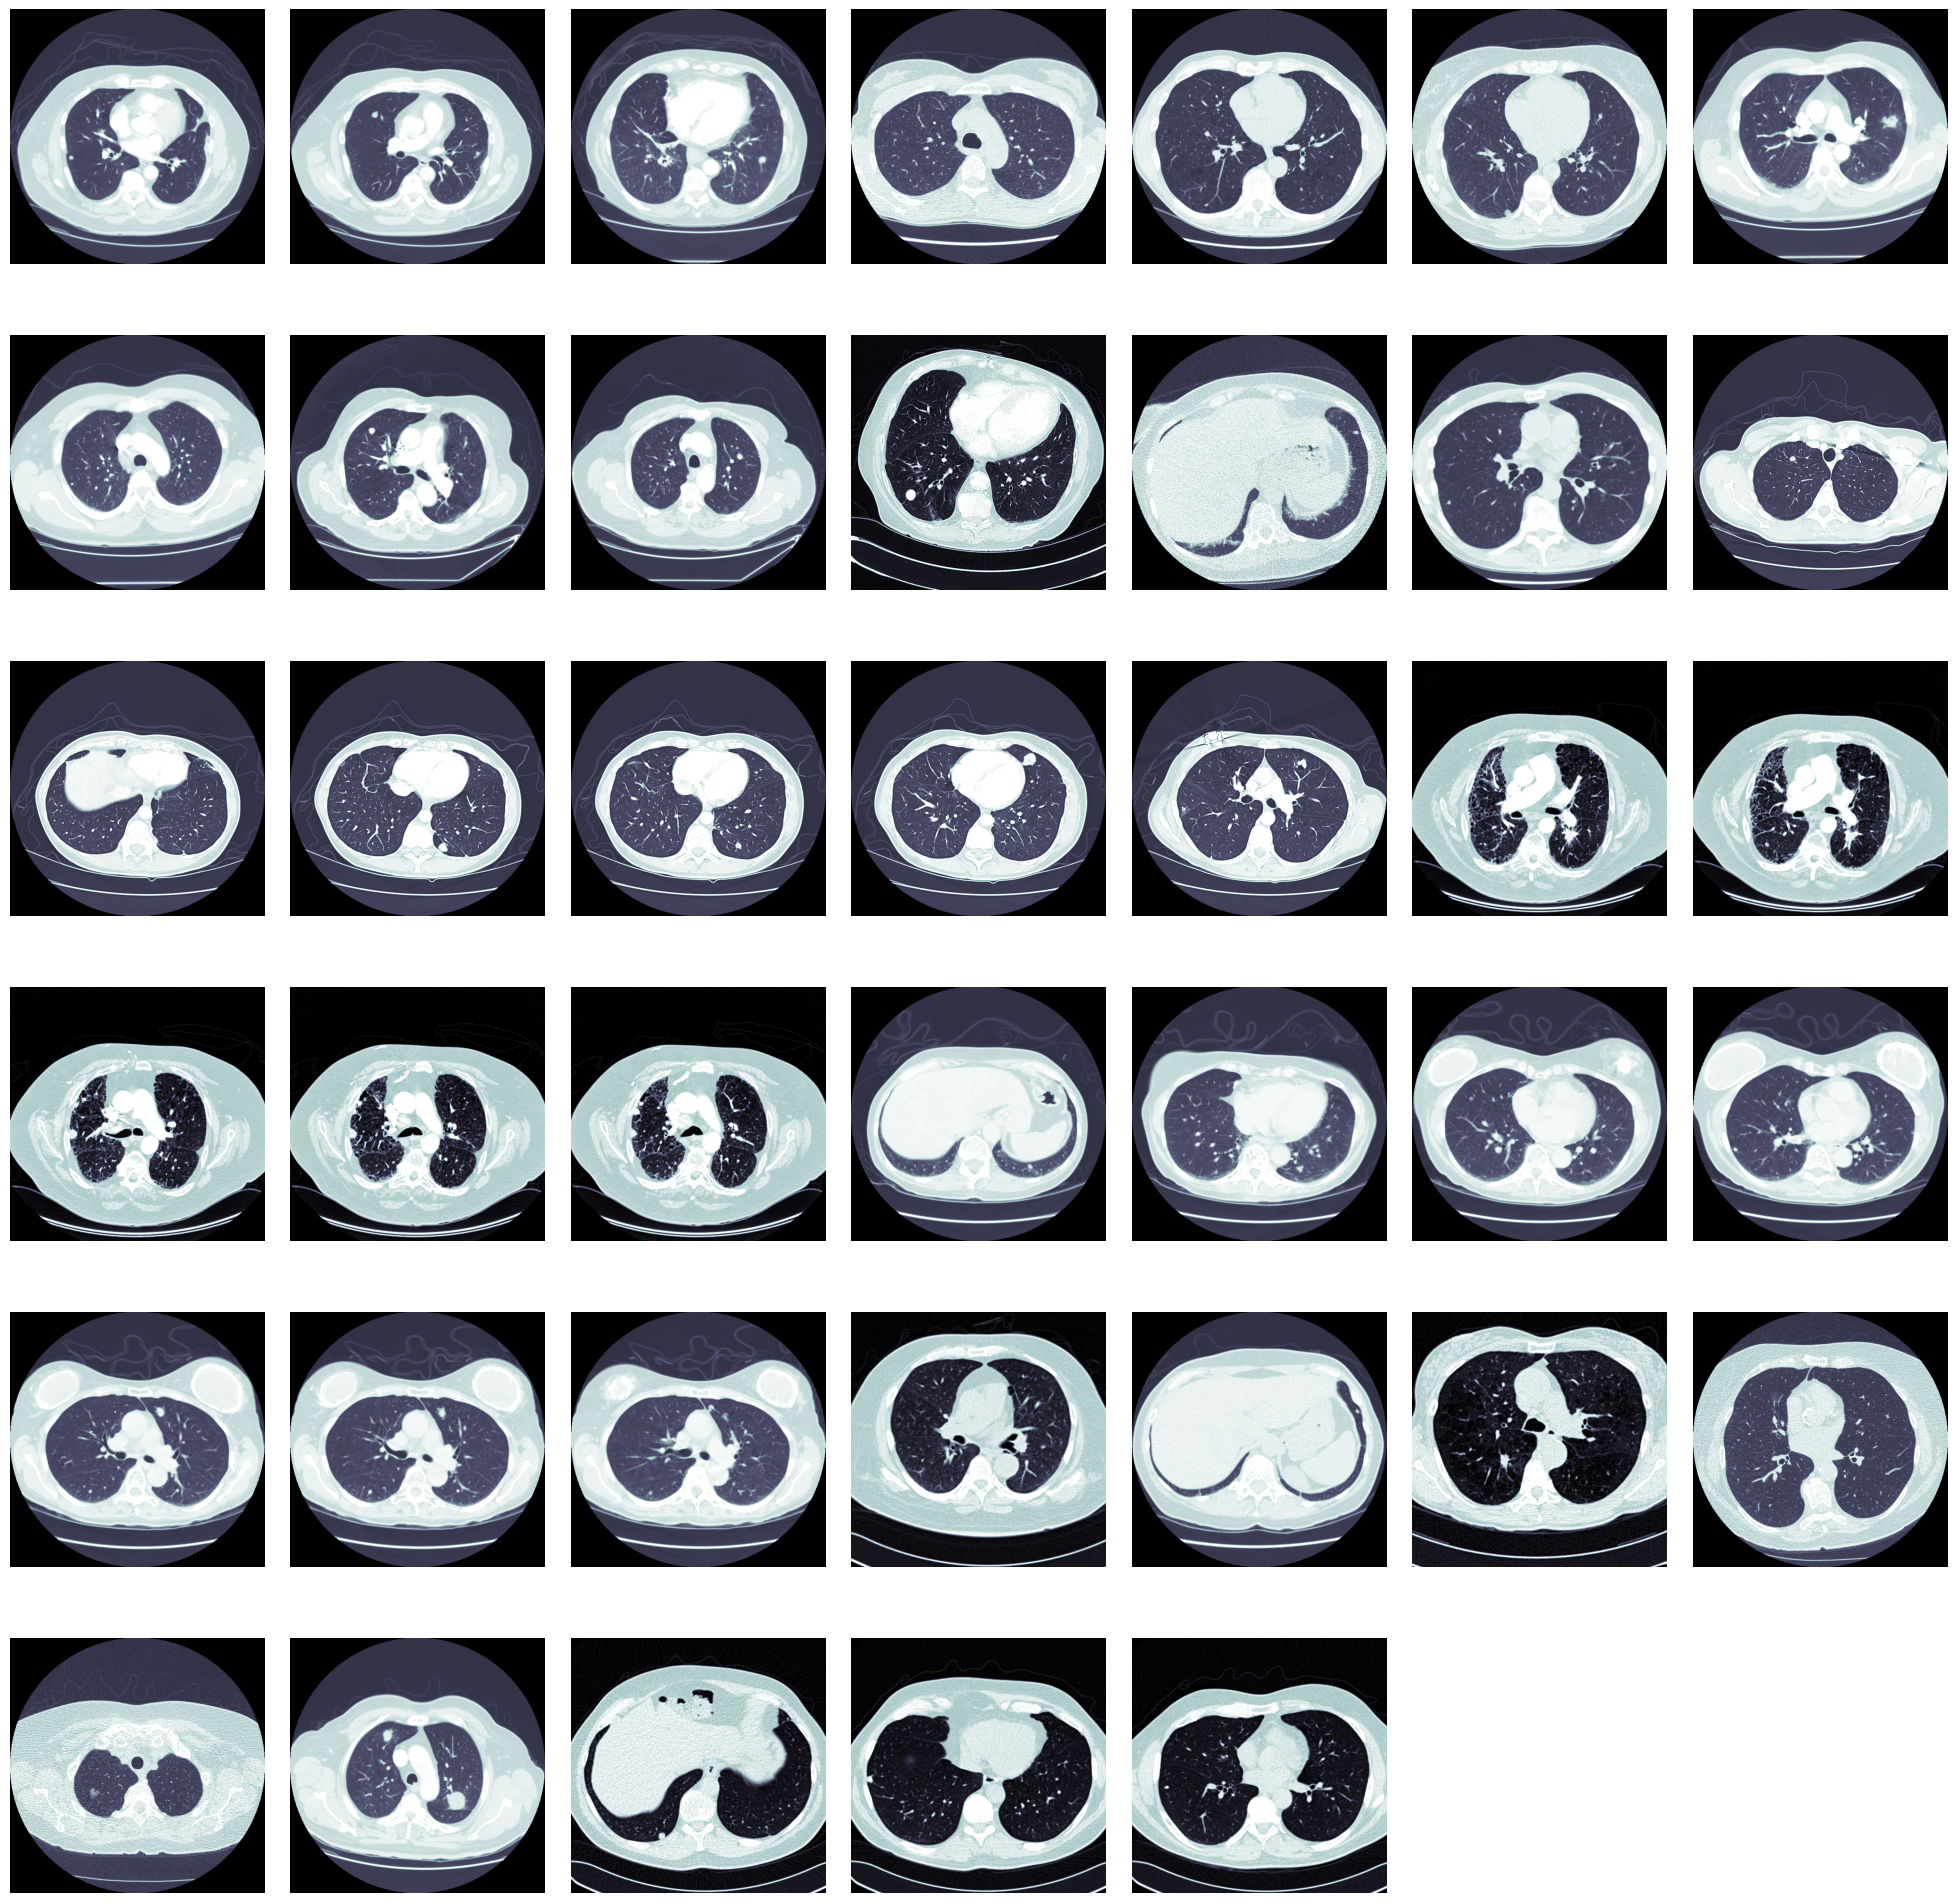

In [9]:
n_samples=len(images)
num_cols = int(np.ceil(np.sqrt(n_samples)))
num_rows = int(np.ceil(n_samples / num_cols))
fig = plt.figure(figsize=(25, 25))
i = 0
for file in images:
    img = np.load(os.path.join("D:/fin_de_etude/data/dataset_2d/nodule/",file),allow_pickle=False)

    axs =   fig.add_subplot(
                                    num_rows, num_cols,  1+i)
    axs.axis('off')
    axs.imshow(img,cmap=plt.cm.bone)
        
            
    i+=1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
   
    # Show the plot
plt.show()


Int64Index([34], dtype='int64')
34    image453_slice113
Name: seriesuid, dtype: object


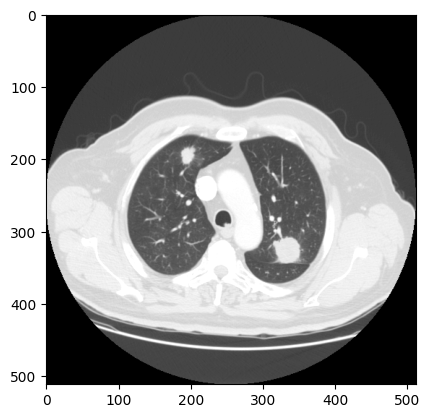

In [10]:
df = ad.read_csv("annotation_2.csv")
df = df[df["diameter_mm"]==39.1813201408]
print(df.index)
file = df["seriesuid"]
print(file)
image_gray = np.load("D:/fin_de_etude/data/dataset_2d/nodule/image453_slice113.npy")
plt.imshow(image_gray,cmap="gray")

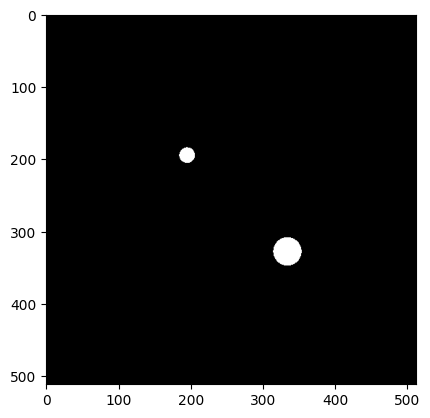

In [11]:
df = ad.read_csv("annotation_2.csv")
df = df[df["seriesuid"]== "image453_slice113"]
mask = np.zeros(image_gray.shape)
for i in df.index:
    x, y, d =float( df["coordX"][i]), float(df["coordY"][i]), float(df["diameter_mm"][i])
    xx, yy = np.meshgrid(np.arange(image_gray.shape[0]), np.arange(image_gray.shape[1]))
    dist = np.sqrt((xx - x) ** 2 + (yy - y) ** 2 )
    mask[dist <= d / 2] = 1
plt.imshow(mask,cmap="gray")

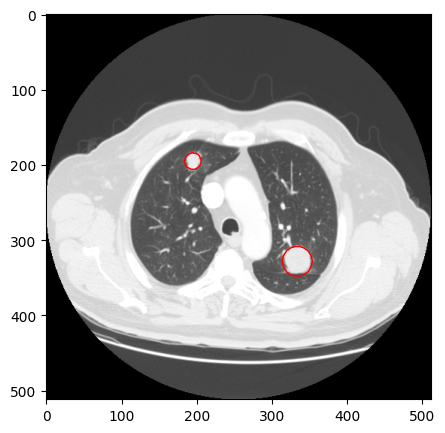

In [12]:
fig,ax1  = plt.subplots(ncols=1, figsize=(5, 5))
ax1.imshow(image_gray,cmap="gray" )

ax1.contour(mask, levels=[0.4], colors='r', linewidths=1)

plt.show()